In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

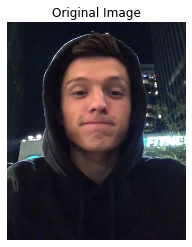

In [13]:
img = cv2.imread('1.jpg') #membaca gambar
img2 = cv2.imread('1.jpg')  
img_out= img.copy()

plt.axis("off") #menampilkan image
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# **Face Detection (segmentation)**

[INFO] Found 39 Faces!


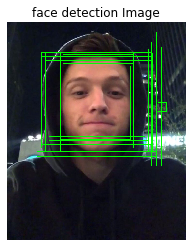

In [14]:
#segmentasi menggunakan cascade classifier dan model deteksi wajah dari cv2
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
faces = faceCascade.detectMultiScale( 
    img,
    scaleFactor=1.3,
    minNeighbors=0,
    minSize=(30, 30)
) #deteksi wajah dengan source image, memperbesar scale, minimal ractangle pada wajah 3, deteksi wajah yang lebih kecil dari (30,30) akan diabaikan

print("[INFO] Found {0} Faces!".format(len(faces))) #print wajah yang terdeteksi

for (x, y, w, h) in faces: 
    cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2) #memberikan rectangle pada wajah yang terdeteksi

status = cv2.imwrite('faces_detected.jpg', img2) #save image
plt.axis("off") #menampilkan gambar yang telah diproses
plt.title('face detection Image')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

[INFO] Found 1 Faces!


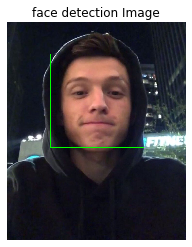

In [15]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    img,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces!".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

status = cv2.imwrite('faces_detected.jpg', img)
plt.axis("off")
plt.title('face detection Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# **Cropping (Operasi Dasar)**

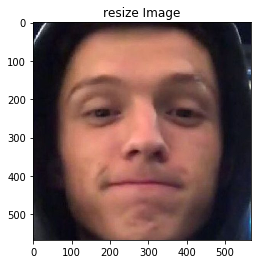

In [16]:
id = 1    
for (x,y,w,h) in faces:
    cropped = img[ y+2 : y+h-1, x+2 : x+w-1 ] #menggunakan array yang termasuk pada x,y,w dan h
    cv2.imwrite("cropped_face.jpg", cropped) #save image
    id+=1

plt.title('resize Image') #menampilkan gambar yang telah diproses
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show()
img = cropped

# **Resizing**

567 567
454 454


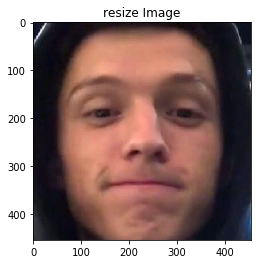

In [17]:
height = img.shape[0] #nilai height dari image
width = img.shape[1] #nilai width dari image
scale=0.8 #memperkecil size gambar dengan 0.8x
n_height = round(height*scale) #nilai new height yang yang diperkecil
n_width = round(width*scale) #nilai new width yang yang diperkecil
img_out= np.zeros((n_height,n_width,3))#membuat array kosong untung menampung img sesudah diresize

img_out=img_out.astype('uint8') * 255  
print(img.shape[0],img.shape[1])
for i in range(n_height):#perulangan selama size new height
    for j in range(n_width): #perulangan selama size new width
        #nearest neighbor interpolation pada 3 channel 
        #(mengambil value array img lama dengan i,j pada kordinat pembulatan i/scale 
        #dan menaruhnya pada kordinat arry baru)
        img_out.itemset((i,j,0),img[round(i/scale)-1][round(j/scale)-1][0])
        img_out.itemset((i,j,1),img[round(i/scale)-1][round(j/scale)-1][1])
        img_out.itemset((i,j,2),img[round(i/scale)-1][round(j/scale)-1][2])
img = img_out
cv2.imwrite("resized.jpg", img_out)


print(img_out.shape[0],img_out.shape[1])
plt.title('resize Image') #menampilkan gambar yang telah diproses
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.show()

# **OpenCV Histogram Equalization**

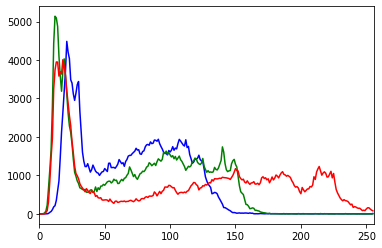

In [18]:
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256]) #plot histogram R G B. nilai 0-256
    plt.plot(hist, color = col) #set color label
    plt.xlim([0, 256])
    
plt.show()

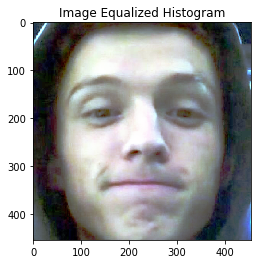

In [19]:
def show_rgb_equalized(image):
    channels = cv2.split(image) #split array menjadi R G B
    eq_channels = []  #inisialisasi
    for ch, color in zip(channels, ['B', 'G', 'R']):
      eq_channels.append(cv2.equalizeHist(ch)) #equalisasi histogram 1 per 1.

    eq_image = cv2.merge(eq_channels) #menggabungkan kembali aray
    cv2.imwrite("Histogram Equalization.jpg", eq_image) #save image
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB) #menampilkan gambar yang telah diproses
    plt.title('Image Equalized Histogram')
    plt.imshow(eq_image)
    plt.show()
    return eq_image
eq_image = show_rgb_equalized(img)

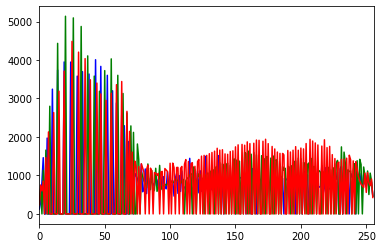

In [20]:
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([eq_image], [i], None, [256], [0, 256]) #menampilkan histogram yang telah diproses
    plt.plot(hist, color = col)
    plt.xlim([0, 256])    
plt.show()
img = eq_image

# **Gaussian Blur**

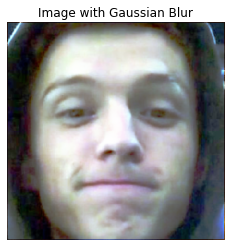

In [21]:
height = img.shape[0]
width = img.shape[1]
#gauss=(1.0/57.0) * np.array([[0,1,2,1,0],[1,3,5,3,1],[2,5,9,5,2],[1,3,5,3,1],[0,1,2,1,0]])
#membuat kernel gauss 5x5
gauss=(1.0/273.0) * np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])
#perulangan untuk konvolusi dengan i dan j awal +2 dan akhir -2 untuk menghindari pojokan pada array gambar
for i in np.arange(2,height-2):
    for j in np.arange(2,width-2):  
        for n in range(0,3):
            sum=0
            #karena kernel sebesar 5x5 maka operasi konvolusi terjadi pada ukuran 5x5 (-2 sampai 2)*(-2 sampai 2)
            for k in np.arange(-2,3): 
                for l in np.arange(-2,3):
                    #perkalian dengan kernel gaus dan dilanjutkan dengan penjumlahan
                    a=img.item(i+k,j+l,n)
                    p=gauss[2+k,2+l]
                    sum = sum + (p*a)
            b=sum
            #mengeset array untuk image baru dengan sum dari value yg dikali dan jumlah kernel gauss
            img_out.itemset((i,j,n),b)

#cv2.imwrite("Gaussion Blur.jpg", img_out)
plt.axis("off")
plt.title('Image with Gaussian Blur')
#plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
cv2.imwrite("Gaussian Blur.jpg", cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.imshow(img_out)
plt.show()            

#**COMPRESSION**

In [0]:
from PIL import Image

img_out_conv=Image.fromarray(img_out) #mengubah array menjadi image
#compress image dengan quality 80, menjadi jpeg dan menghilangkan warna dari palette gambar yg tidak terpakai
img_out_conv.save("hasil-compress-80.jpeg", optimize=True, quality=80) 